In [1]:
                    # This Python 3 environment comes with many helpful analytics libraries installed



# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python



# For example, here's several helpful packages to load







import numpy as np # linear algebra



import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)







# Input data files are available in the read-only "../input/" directory



# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory







import os



for dirname, _, filenames in os.walk('/kaggle/input'):



    for filename in filenames:



        print(os.path.join(dirname, filename))







# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 



# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/child-mind-institute-problematic-internet-use/sample_submission.csv
/kaggle/input/child-mind-institute-problematic-internet-use/data_dictionary.csv
/kaggle/input/child-mind-institute-problematic-internet-use/train.csv
/kaggle/input/child-mind-institute-problematic-internet-use/test.csv
/kaggle/input/child-mind-institute-problematic-internet-use/series_test.parquet/id=00115b9f/part-0.parquet
/kaggle/input/child-mind-institute-problematic-internet-use/series_test.parquet/id=001f3379/part-0.parquet
/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet/id=0745c390/part-0.parquet
/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet/id=eaab7a96/part-0.parquet
/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet/id=8ec2cc63/part-0.parquet
/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet/id=b2987a65/part-0.parquet
/kaggle/input/child-mind-institute-problematic-intern

# Import

In [2]:
import numpy as np, pandas as pd, os



import xgboost as xgb



import plotly.express as px, seaborn as sns, matplotlib.pyplot as plt



from sklearn.model_selection import cross_val_score, StratifiedKFold



from sklearn.metrics import make_scorer, cohen_kappa_score



import eli5



from eli5.sklearn import PermutationImportance



import warnings



sns.set_style('darkgrid')



warnings.simplefilter('ignore')

# Đọc DL

In [3]:
df_train = pd.read_csv("/kaggle/input/child-mind-institute-problematic-internet-use/train.csv", index_col='id')



df_test = pd.read_csv("/kaggle/input/child-mind-institute-problematic-internet-use/test.csv", index_col='id')



data_dictionary = pd.read_csv("/kaggle/input/child-mind-institute-problematic-internet-use/data_dictionary.csv")

In [4]:
df_train.head()

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
id,,,,,,,,,,,,,,,,,,,,,
00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_test.head()

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
id,,,,,,,,,,,,,,,,,,,,,
00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print("Missing training values: ", df_train.isna().sum().sum())

Missing training values:  131717


In [7]:
df_train

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
id,,,,,,,,,,,,,,,,,,,,,
00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,NaN,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,0.0,NaN
ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,NaN,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0


In [8]:
df_test

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
id,,,,,,,,,,,,,,,,,,,,,
00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.00,50.8,NaN,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.00,46.0,22.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.50,75.6,NaN,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.00,81.6,NaN,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.50,112.2,NaN,...,63.1265,NaN,NaN,Spring,4.110,Summer,40.0,56.0,Spring,0.0
0038ba98,Fall,10,0,NaN,NaN,Fall,19.660760,55.00,84.6,NaN,...,47.2211,NaN,NaN,Winter,3.670,Winter,27.0,40.0,Fall,3.0
0068a485,Fall,10,1,NaN,NaN,Fall,16.861286,59.25,84.2,27.0,...,50.4767,NaN,NaN,Fall,1.270,NaN,NaN,NaN,Fall,2.0
0069fbed,Summer,15,0,NaN,NaN,Spring,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.0


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3960 entries, 00008ff9 to ffef538e
Data columns (total 81 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Enroll_Season               3960 non-null   object 
 1   Basic_Demos-Age                         3960 non-null   int64  
 2   Basic_Demos-Sex                         3960 non-null   int64  
 3   CGAS-Season                             2555 non-null   object 
 4   CGAS-CGAS_Score                         2421 non-null   float64
 5   Physical-Season                         3310 non-null   object 
 6   Physical-BMI                            3022 non-null   float64
 7   Physical-Height                         3027 non-null   float64
 8   Physical-Weight                         3076 non-null   float64
 9   Physical-Waist_Circumference            898 non-null    float64
 10  Physical-Diastolic_BP                   2954 non-null 

# Mã hóa DL

In [10]:
df_cat_train = df_train.select_dtypes(exclude = 'number').columns







for season in df_cat_train:



    df_train[season] = df_train[season].fillna(0)



    df_train[season] = df_train[season].replace({'Spring':1, 'Summer':2, 'Fall':3, 'Winter':4})

In [11]:
print(df_cat_train)

Index(['Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season',
       'Fitness_Endurance-Season', 'FGC-Season', 'BIA-Season', 'PAQ_A-Season',
       'PAQ_C-Season', 'PCIAT-Season', 'SDS-Season', 'PreInt_EduHx-Season'],
      dtype='object')


In [12]:
df_cat_test = df_test.select_dtypes(exclude = 'number').columns







for season in df_cat_test:



    df_test[season] = df_test[season].fillna(0)



    df_test[season] = df_test[season].replace({'Spring':1, 'Summer':2, 'Fall':3, 'Winter':4})

In [13]:
print(df_cat_train)

Index(['Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season',
       'Fitness_Endurance-Season', 'FGC-Season', 'BIA-Season', 'PAQ_A-Season',
       'PAQ_C-Season', 'PCIAT-Season', 'SDS-Season', 'PreInt_EduHx-Season'],
      dtype='object')


In [14]:
df_train.head()

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
id,,,,,,,,,,,,,,,,,,,,,
00008ff9,3,5,0,4,51.0,3,16.877316,46.0,50.8,NaN,...,4.0,2.0,4.0,55.0,0,NaN,NaN,3,3.0,2.0
000fd460,2,9,0,0,NaN,3,14.035590,48.0,46.0,22.0,...,0.0,0.0,0.0,0.0,3,46.0,64.0,2,0.0,0.0
00105258,2,10,1,3,71.0,3,16.648696,56.5,75.6,NaN,...,2.0,1.0,1.0,28.0,3,38.0,54.0,2,2.0,0.0
00115b9f,4,9,0,3,71.0,2,18.292347,56.0,81.6,NaN,...,3.0,4.0,1.0,44.0,2,31.0,45.0,4,0.0,1.0
0016bb22,1,18,1,2,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN


In [15]:
df_test.head()

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
id,,,,,,,,,,,,,,,,,,,,,
00008ff9,3,5,0,4,51.0,3,16.877316,46.0,50.8,NaN,...,32.6909,0,NaN,0,NaN,0,NaN,NaN,3,3.0
000fd460,2,9,0,0,NaN,3,14.035590,48.0,46.0,22.0,...,27.0552,0,NaN,3,2.340,3,46.0,64.0,2,0.0
00105258,2,10,1,3,71.0,3,16.648696,56.5,75.6,NaN,...,NaN,0,NaN,2,2.170,3,38.0,54.0,2,2.0
00115b9f,4,9,0,3,71.0,2,18.292347,56.0,81.6,NaN,...,45.9966,0,NaN,4,2.451,2,31.0,45.0,4,0.0
0016bb22,1,18,1,2,NaN,0,NaN,NaN,NaN,NaN,...,NaN,2,1.04,0,NaN,0,NaN,NaN,0,NaN


# PCIAT

In [16]:
PCIAT_cols = [val for val in df_train.columns[df_train.columns.str.contains('PCIAT')]]



print('PCIAT features = ' , len(PCIAT_cols))

PCIAT features =  22


In [17]:
pd.set_option('display.max_colwidth', None)



questions = data_dictionary[data_dictionary.Field.str.contains('PCIAT-PCIAT')]



questions[['Field','Description']]

,Field,Description
55,PCIAT-PCIAT_01,How often does your child disobey time limits you set for online use?
56,PCIAT-PCIAT_02,How often does your child neglect household chores to spend more time online?
57,PCIAT-PCIAT_03,How often does your child prefer to spend time online rather than with the rest of your family?
58,PCIAT-PCIAT_04,How often does your child form new relationships with fellow online users?
59,PCIAT-PCIAT_05,How often do you complain about the amount of time your child spends online?
60,PCIAT-PCIAT_06,How often do your child's grades suffer because of the amount of time he or she spends online?
61,PCIAT-PCIAT_07,How often does your child check his or her e-mail before doing something else?
62,PCIAT-PCIAT_08,How often does your child seem withdrawn from others since discovering the Internet?
63,PCIAT-PCIAT_09,How often does your child become defensive or secretive when asked what he or she does online?
64,PCIAT-PCIAT_10,How often have you caught your child sneaking online against your wishes?


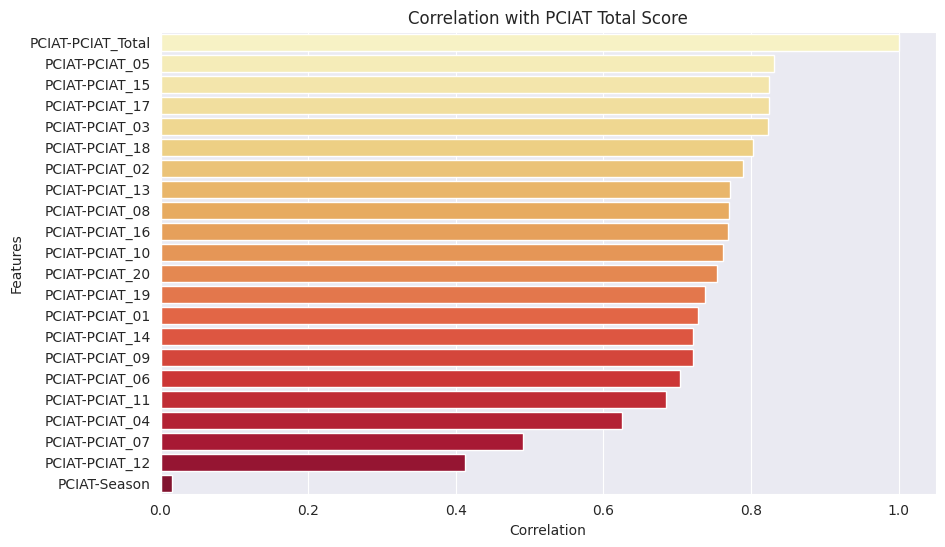

In [18]:
corr = df_train[PCIAT_cols].corr()['PCIAT-PCIAT_Total'].sort_values(ascending=False)







plt.figure(figsize=(10, 6))



sns.barplot(x=corr.values, y=corr.index, palette="YlOrRd")



plt.title("Correlation with PCIAT Total Score")



plt.xlabel("Correlation")



plt.ylabel("Features")



plt.show()

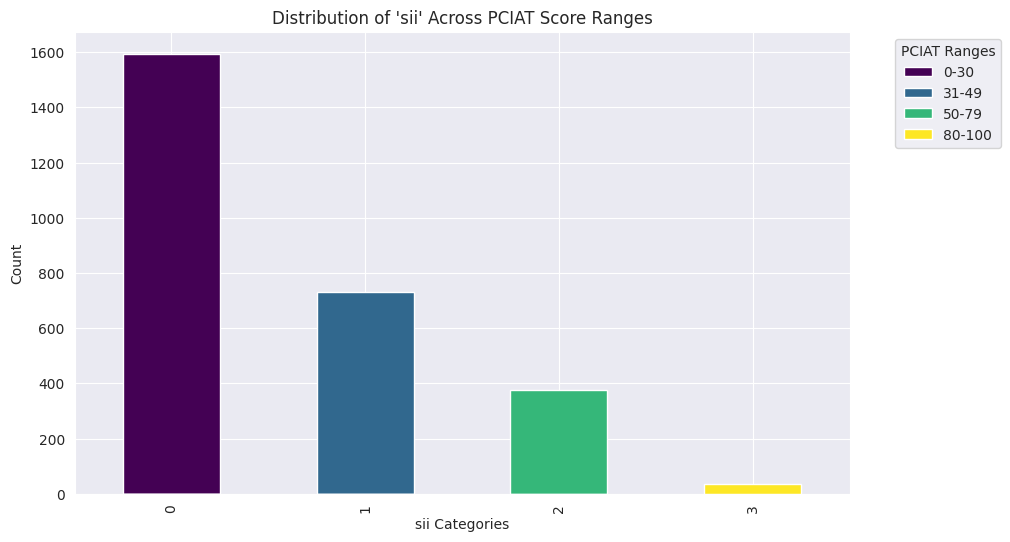

In [19]:
# Tạo dữ liệu tổng hợp



ranges = [



    "0-30", 



    "31-49", 



    "50-79", 



    "80-100"



]



counts = [



    df_train[df_train['PCIAT-PCIAT_Total'] <= 30].sii.value_counts(),



    df_train[(df_train['PCIAT-PCIAT_Total'] > 30) & (df_train['PCIAT-PCIAT_Total'] < 50)].sii.value_counts(),



    df_train[(df_train['PCIAT-PCIAT_Total'] >= 50) & (df_train['PCIAT-PCIAT_Total'] < 80)].sii.value_counts(),



    df_train[df_train['PCIAT-PCIAT_Total'] >= 80].sii.value_counts()



]







# Chuyển dữ liệu thành dataframe



summary = pd.DataFrame(counts, index=ranges).fillna(0).T



summary.index = summary.index.astype(int)  # Đổi tên cột `sii` thành số nguyên







# Vẽ biểu đồ



summary.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')



plt.title("Distribution of 'sii' Across PCIAT Score Ranges")



plt.xlabel("sii Categories")



plt.ylabel("Count")



plt.legend(title="PCIAT Ranges", bbox_to_anchor=(1.05, 1), loc='upper left')



plt.show()

In [20]:
PCIAT_cols.remove('PCIAT-PCIAT_Total')



df_train = df_train.drop(columns = PCIAT_cols)

In [21]:
PCIAT_cols

['PCIAT-Season',
 'PCIAT-PCIAT_01',
 'PCIAT-PCIAT_02',
 'PCIAT-PCIAT_03',
 'PCIAT-PCIAT_04',
 'PCIAT-PCIAT_05',
 'PCIAT-PCIAT_06',
 'PCIAT-PCIAT_07',
 'PCIAT-PCIAT_08',
 'PCIAT-PCIAT_09',
 'PCIAT-PCIAT_10',
 'PCIAT-PCIAT_11',
 'PCIAT-PCIAT_12',
 'PCIAT-PCIAT_13',
 'PCIAT-PCIAT_14',
 'PCIAT-PCIAT_15',
 'PCIAT-PCIAT_16',
 'PCIAT-PCIAT_17',
 'PCIAT-PCIAT_18',
 'PCIAT-PCIAT_19',
 'PCIAT-PCIAT_20']

In [22]:
df_train

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,...,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
id,,,,,,,,,,,,,,,,,,,,,
00008ff9,3,5,0,4,51.0,3,16.877316,46.0,50.8,NaN,...,NaN,0,NaN,55.0,0,NaN,NaN,3,3.0,2.0
000fd460,2,9,0,0,NaN,3,14.035590,48.0,46.0,22.0,...,NaN,3,2.340,0.0,3,46.0,64.0,2,0.0,0.0
00105258,2,10,1,3,71.0,3,16.648696,56.5,75.6,NaN,...,NaN,2,2.170,28.0,3,38.0,54.0,2,2.0,0.0
00115b9f,4,9,0,3,71.0,2,18.292347,56.0,81.6,NaN,...,NaN,4,2.451,44.0,2,31.0,45.0,4,0.0,1.0
0016bb22,1,18,1,2,NaN,0,NaN,NaN,NaN,NaN,...,1.04,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff8a2de4,3,13,0,1,60.0,3,16.362460,59.5,82.4,NaN,...,NaN,4,3.260,32.0,4,35.0,50.0,3,1.0,1.0
ffa9794a,4,10,0,0,NaN,1,18.764678,53.5,76.4,27.0,...,NaN,4,2.340,NaN,0,NaN,NaN,4,0.0,NaN
ffcd4dbd,3,11,0,1,68.0,4,21.441500,60.0,109.8,NaN,...,NaN,4,2.729,31.0,4,56.0,77.0,3,0.0,1.0


# SII

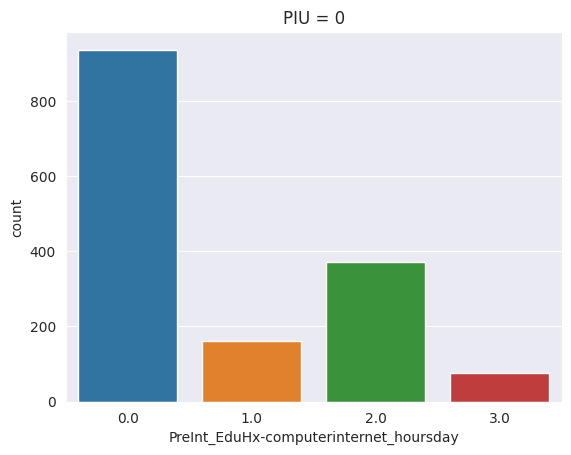

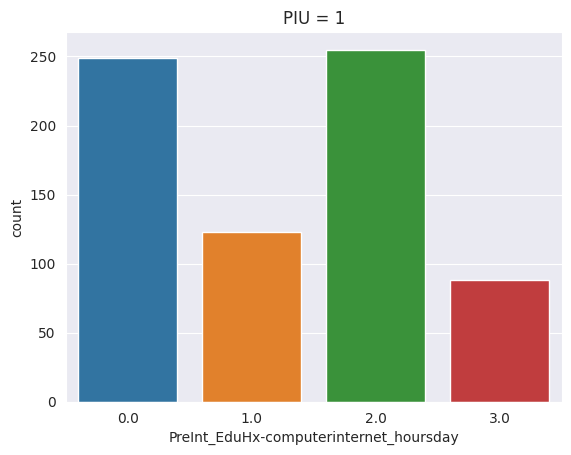

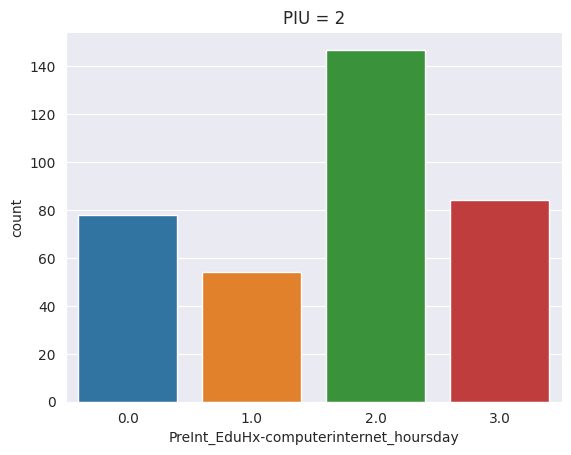

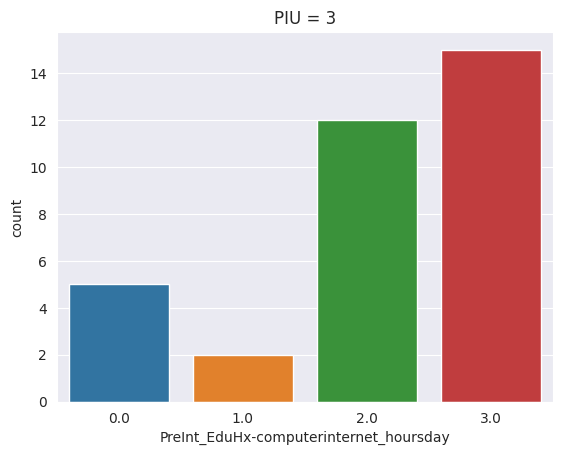

In [23]:
vals = ['PIU = 0', 'PIU = 1','PIU = 2', 'PIU = 3']







for i in range(4):



    plt.figure()



    plot = sns.countplot(x = df_train[df_train.sii==i]['PreInt_EduHx-computerinternet_hoursday'])



    plot.set_title(vals[i])

In [24]:
df_train = df_train.dropna(subset='sii')

# Lọc DL

## Tương quan

In [25]:
corr = pd.DataFrame(df_train.corr()['PCIAT-PCIAT_Total'].sort_values(ascending = False))

corr.style.background_gradient(cmap='YlOrRd')

,PCIAT-PCIAT_Total
PCIAT-PCIAT_Total,1.000000
sii,0.899681
Physical-Height,0.420765
Basic_Demos-Age,0.409559
PreInt_EduHx-computerinternet_hoursday,0.374124
Physical-Weight,0.353048
Physical-Waist_Circumference,0.327013
FGC-FGC_CU,0.287494
BIA-BIA_BMI,0.248060
Physical-BMI,0.240858


In [26]:
selection = corr[(corr['PCIAT-PCIAT_Total']>.1) | (corr['PCIAT-PCIAT_Total']<-.1)]

selection = [val for val in selection.index]

selection.remove('PCIAT-PCIAT_Total')

selection.remove('sii')

selection.remove('Physical-BMI')

selection.remove('SDS-SDS_Total_Raw')

selection

['Physical-Height',
 'Basic_Demos-Age',
 'PreInt_EduHx-computerinternet_hoursday',
 'Physical-Weight',
 'Physical-Waist_Circumference',
 'FGC-FGC_CU',
 'BIA-BIA_BMI',
 'SDS-SDS_Total_T',
 'PAQ_A-Season',
 'FGC-FGC_PU',
 'BIA-BIA_Frame_num',
 'FGC-FGC_GSD',
 'Physical-Systolic_BP',
 'FGC-FGC_GSND',
 'FGC-FGC_TL',
 'PAQ_C-Season',
 'BIA-BIA_FFMI',
 'FGC-FGC_SRR_Zone',
 'FGC-FGC_SRL_Zone']

## Giá trị thiếu

In [27]:
null = df_train.isna().sum().sort_values(ascending = False).head(46)

null = pd.DataFrame(null)

null = null.rename(columns= {0:'Missing'})

null.style.background_gradient(cmap='YlOrRd')

,Missing
PAQ_A-PAQ_A_Total,2373
Physical-Waist_Circumference,2253
Fitness_Endurance-Time_Sec,2008
Fitness_Endurance-Time_Mins,2008
Fitness_Endurance-Max_Stage,2005
FGC-FGC_GSD_Zone,1872
FGC-FGC_GSND_Zone,1872
FGC-FGC_GSD,1865
FGC-FGC_GSND,1864
PAQ_C-PAQ_C_Total,1296


In [28]:
selection = [i for i in selection if i not in df_train.columns[df_train.isnull().sum() > len(df_train) / 2]]

selection

['Physical-Height',
 'Basic_Demos-Age',
 'PreInt_EduHx-computerinternet_hoursday',
 'Physical-Weight',
 'FGC-FGC_CU',
 'BIA-BIA_BMI',
 'SDS-SDS_Total_T',
 'PAQ_A-Season',
 'FGC-FGC_PU',
 'BIA-BIA_Frame_num',
 'Physical-Systolic_BP',
 'FGC-FGC_TL',
 'PAQ_C-Season',
 'BIA-BIA_FFMI',
 'FGC-FGC_SRR_Zone',
 'FGC-FGC_SRL_Zone']

## Đặc trưng được chọn

In [29]:
describe = df_train[selection].describe().T

describe = describe[['min','max']].sort_index()

describe.style.background_gradient(cmap='YlOrRd')

,min,max
BIA-BIA_BMI,0.048267,48.375400
BIA-BIA_FFMI,7.864850,217.771000
BIA-BIA_Frame_num,1.000000,3.000000
Basic_Demos-Age,5.000000,22.000000
FGC-FGC_CU,0.000000,115.000000
FGC-FGC_PU,0.000000,51.000000
FGC-FGC_SRL_Zone,0.000000,1.000000
FGC-FGC_SRR_Zone,0.000000,1.000000
FGC-FGC_TL,0.000000,21.000000
PAQ_A-Season,0.000000,4.000000


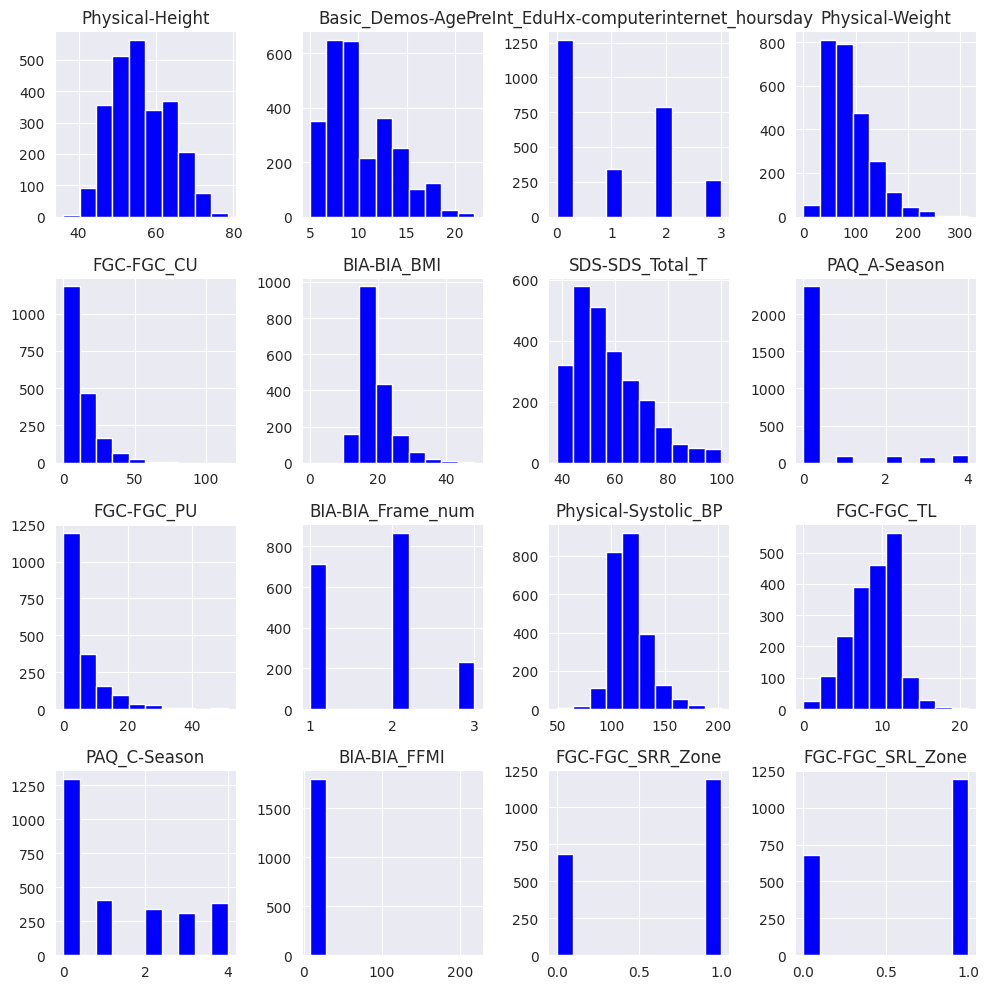

In [30]:
df_train[selection].hist(figsize=(10,10), grid = True, color = 'blue')

plt.tight_layout()

# Classification Model

In [31]:
X_features = df_train[selection] 

test_features = df_test[selection] 

y_target = df_train.sii 

In [32]:
def calculate_quadratic_kappa(true_labels, predicted_labels):

    return cohen_kappa_score(true_labels, predicted_labels, weights='quadratic')

quadratic_kappa_scorer = make_scorer(calculate_quadratic_kappa)

In [33]:
xgb_params = {

    'max_depth': 3,

    'n_estimators': 202,

    'learning_rate': 0.07956777025142073,

    'subsample': 0.8197358255094112,

    'colsample_bytree': 0.645036755035947

}

cross_validator = StratifiedKFold(n_splits=10)

classifier = xgb.XGBClassifier(**xgb_params)

In [34]:
cv_scores = cross_val_score(classifier, X_features, y_target, cv=cross_validator, scoring=quadratic_kappa_scorer)

print("QWK Scores:", cv_scores)

print("Mean QWK Score:", np.mean(cv_scores))

QWK Scores: [0.32619388 0.27592491 0.38283353 0.3599578  0.41978348 0.35794381
 0.39883915 0.4625643  0.35390107 0.41028082]
Mean QWK Score: 0.3748222749214758


In [35]:
classifier.fit(X_features, y_target)

feature_importance = pd.Series(classifier.feature_importances_, index=X_features.columns).sort_values(ascending=False)

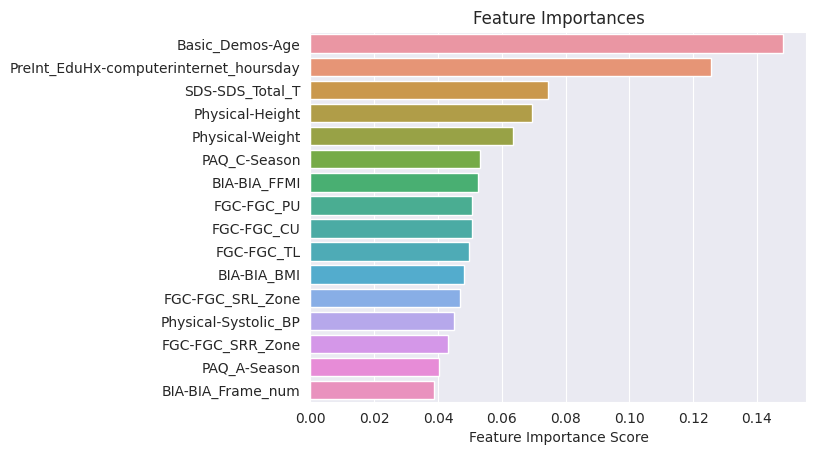

In [36]:
sns.barplot(x=feature_importance, y=feature_importance.index)

plt.xlabel('Feature Importance Score')

plt.title("Feature Importances")

plt.show()

In [37]:
permutation_importance = PermutationImportance(classifier, random_state=1).fit(X_features, y_target)

eli5.show_weights(permutation_importance, feature_names=X_features.columns.tolist())

Weight,Feature
0.0752 ± 0.0095,SDS-SDS_Total_T
0.0588 ± 0.0074,PreInt_EduHx-computerinternet_hoursday
0.0466 ± 0.0102,Basic_Demos-Age
0.0409 ± 0.0067,BIA-BIA_FFMI
0.0385 ± 0.0051,Physical-Height
0.0340 ± 0.0058,FGC-FGC_CU
0.0317 ± 0.0070,BIA-BIA_BMI
0.0294 ± 0.0059,Physical-Weight
0.0292 ± 0.0060,Physical-Systolic_BP
0.0223 ± 0.0032,FGC-FGC_PU


# Submission

In [38]:
classifier.fit(X_features, y_target)

test_predictions = classifier.predict(test_features)

submission = pd.DataFrame({'id': test_features.index, 'sii': test_predictions})

submission.to_csv('submission.csv', index=False)

In [39]:
print(submission)

          id  sii
0   00008ff9    0
1   000fd460    0
2   00105258    0
3   00115b9f    0
4   0016bb22    0
5   001f3379    1
6   0038ba98    0
7   0068a485    0
8   0069fbed    0
9   0083e397    0
10  0087dd65    0
11  00abe655    0
12  00ae59c9    1
13  00af6387    0
14  00bd4359    1
15  00c0cd71    0
16  00d56d4b    0
17  00d9913d    0
18  00e6167c    0
19  00ebc35d    0
